## **Dimension Reduction for Numeric Variables**

Variance indication information. The higher a variable varies, the more information it contains.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/cereal.csv')

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


<ipython-input-6-2459d3fdd38b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


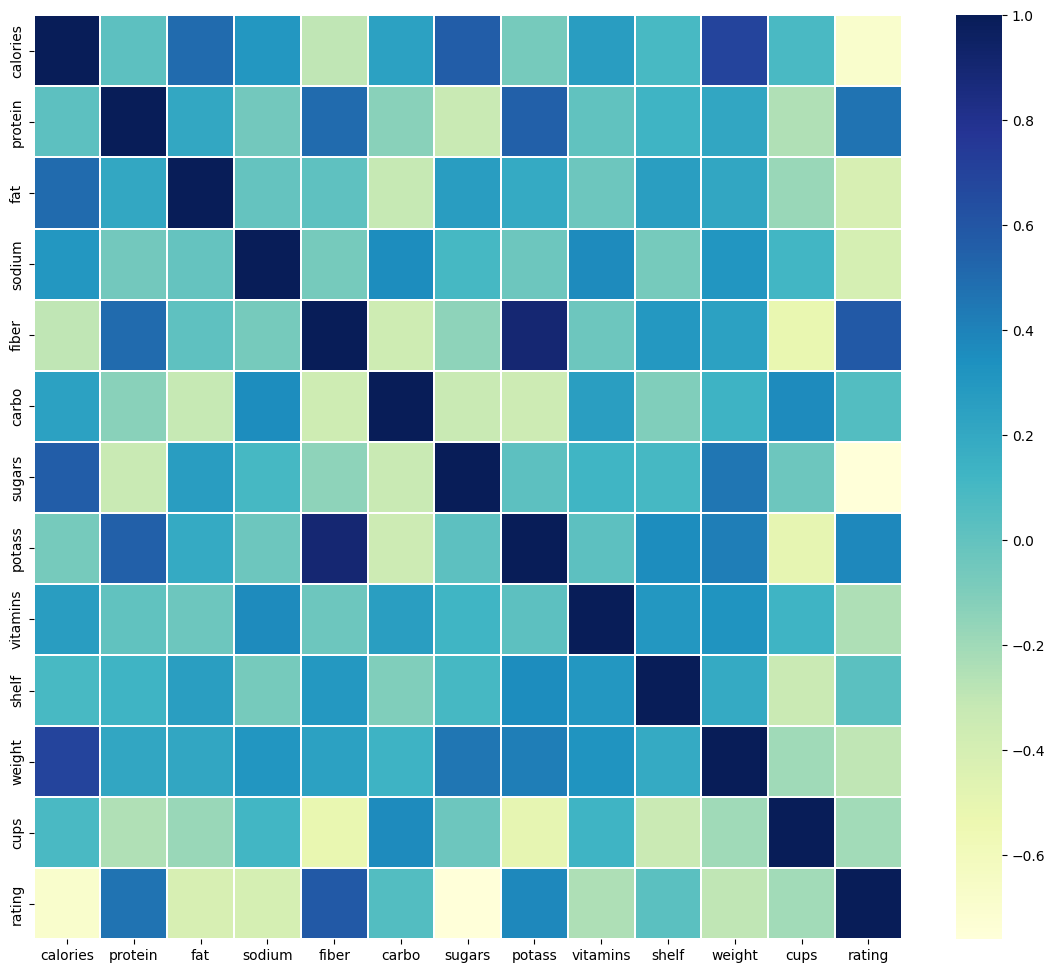

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()

f, ax = plt.subplots(figsize =(14, 12))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1);

### **Calories and Rating**

In [ ]:
df_small = df[['calories', 'rating']].copy()

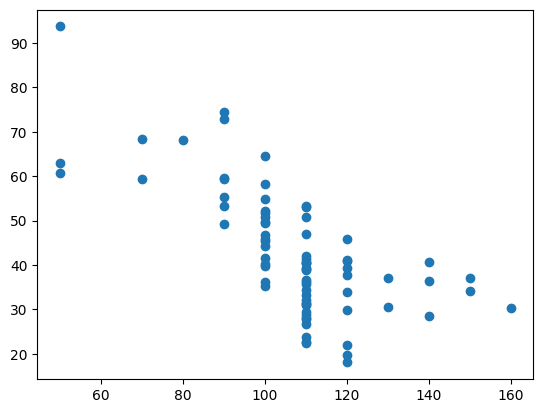

In [ ]:
plt.scatter(df['calories'], df['rating'])

In [ ]:
df_small['Combined'] = df['calories'] + df['rating']

In [ ]:
df_small

,calories,rating,Combined
0,70,68.402973,138.402973
1,120,33.983679,153.983679
2,70,59.425505,129.425505
3,50,93.704912,143.704912
4,110,34.384843,144.384843
...,...,...,...
72,110,39.106174,149.106174
73,110,27.753301,137.753301
74,100,49.787445,149.787445
75,100,51.592193,151.592193


In [ ]:
df_small.drop('Combined', axis = 1, inplace = True)

In [ ]:
df[['calories', 'rating']].cov()

,calories,rating
calories,379.630895,-188.681562
rating,-188.681562,197.326321


In [ ]:
df['calories'].var()

379.63089542036914

In [ ]:
df['rating'].var()

197.3263210498702

In [ ]:
df['calories'].var()+df['rating'].var()

576.9572164702394

In [ ]:
df['calories'].var() / (df['calories'].var()+df['rating'].var())

0.6579879488169142

## **Principal Component Analysis**

The goal is to create new variables (PCs) that contain most of the information and get rid of the correlation.

In [ ]:
## check for missing
df_small.isna().sum()

calories    0
rating      0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_small)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.86319135, 0.13680865])

In [ ]:
Z = pca.transform(df_small)

In [ ]:
Z = pd.DataFrame(Z, columns = ['PC1', 'PC2'])

In [ ]:
Z

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686
...,...,...
72,-4.532085,-1.358466
73,-10.566224,-10.974956
74,9.615628,2.374065
75,10.574865,3.902783


<Axes: xlabel='PC1', ylabel='PC2'>

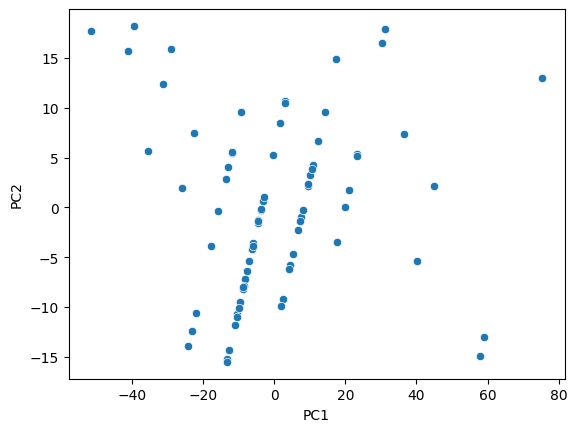

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = Z)

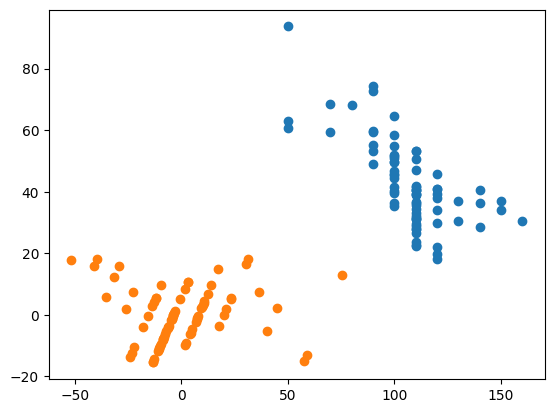

In [ ]:
plt.scatter(df['calories'], df['rating'])
plt.scatter(Z['PC1'], Z['PC2'])
plt.show()

In [ ]:
Z

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686
...,...,...
72,-4.532085,-1.358466
73,-10.566224,-10.974956
74,9.615628,2.374065
75,10.574865,3.902783


In [ ]:
z11 = df_small['calories'] + df_small['rating']
z11

0     138.402973
1     153.983679
2     129.425505
3     143.704912
4     144.384843
         ...    
72    149.106174
73    137.753301
74    149.787445
75    151.592193
76    146.187559
Length: 77, dtype: float64

## **Weights**

The weights are called components.

In [ ]:
pca.components_

array([[-0.84705348,  0.53150766],
       [ 0.53150766,  0.84705348]])

In [ ]:
-0.84705348 * (df_small['calories'] - df_small['calories'].mean())  + 0.53150766* (df_small['rating']- df_small['rating'].mean())

0     44.921528
1    -15.725265
2     40.149935
3     75.310772
4     -7.041508
        ...    
72    -4.532085
73   -10.566224
74     9.615627
75    10.574865
76    -6.083351
Length: 77, dtype: float64

In [ ]:
0.53150766 * (df_small['calories'] - df_small['calories'].mean())  + 0.84705348* (df_small['rating']- df_small['rating'].mean())

0      2.197183
1     -0.382416
2     -5.407212
3     12.999126
4     -5.357686
        ...    
72    -1.358466
73   -10.974956
74     2.374065
75     3.902783
76    -3.830689
Length: 77, dtype: float64

In [ ]:
Z.cov()

,PC1,PC2
PC1,4.980245e+02,-2.292510e-14
PC2,-2.292510e-14,7.893274e+01


In [ ]:
Z.corr()

,PC1,PC2
PC1,1.000000e+00,-1.593820e-16
PC2,-1.593820e-16,1.000000e+00


In [ ]:
Z['PC1'].var() + Z['PC2'].var()

576.9572164702394

## **Example with more variables**

In [ ]:
## missing
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
Combined    0
dtype: int64

In [ ]:
## no categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
 16  Combined  77 non-null     float64
dtypes: float64(6), int64(8), object(3)
memory usage: 10.4+ KB


In [ ]:
pca = PCA()

pca.fit(df.drop(['name', 'mfr', 'type'], axis = 1))

PCA()

In [ ]:
pca.explained_variance_ratio_

array([5.35725866e-01, 3.80488100e-01, 4.23174332e-02, 2.84878682e-02,
       1.20930087e-02, 4.33429289e-04, 3.46071227e-04, 4.83064659e-05,
       3.59548931e-05, 2.10971999e-05, 2.53274895e-06, 3.32595781e-07,
       2.09661087e-19, 2.43519325e-32])

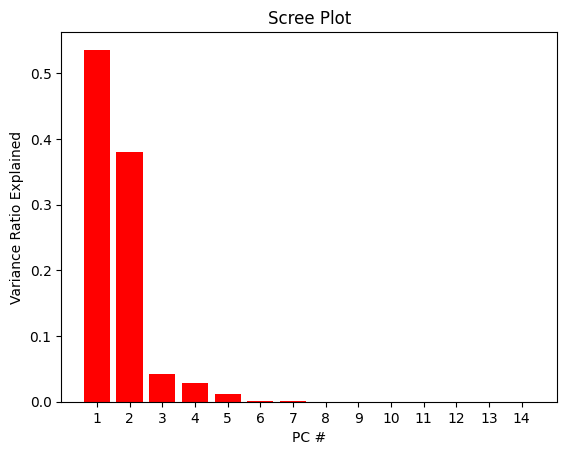

In [ ]:
features = np.array(range(pca.n_components_))+1
plt.bar(features, pca.explained_variance_ratio_, color = 'red')
plt.title("Scree Plot")
plt.xlabel('PC #')
plt.ylabel('Variance Ratio Explained')
plt.xticks(features)
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.53572587, 0.91621397, 0.9585314 , 0.98701927, 0.99911228,
       0.9995457 , 0.99989178, 0.99994008, 0.99997604, 0.99999713,
       0.99999967, 1.        , 1.        , 1.        ])

In [ ]:
Z = pca.transform(df.drop(['name', 'mfr', 'type'], axis = 1))

In [ ]:
Z.shape

(77, 14)

In [ ]:
Z = pd.DataFrame(Z, columns = [f"PC{number}" for number in np.array(range(pca.n_components_))+1])

In [ ]:
Z

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-54.203928,180.241219,-35.080521,17.821466,-5.801299,2.824990,2.747005,-0.739545,-0.057772,-0.294977,-0.077793,0.018639,3.639406e-08,-4.226706e-16
1,-147.713280,21.424183,18.169854,-26.046119,-15.856268,1.570889,-5.377565,-0.934459,0.443980,-1.258467,0.329214,-0.082637,1.702358e-09,6.335736e-15
2,70.010604,233.119253,-52.557325,12.119443,-14.738631,0.165752,-1.189099,0.294221,0.407802,0.120752,-0.125325,0.045183,5.139377e-08,1.523802e-14
3,-53.156470,232.989007,-55.717183,27.723947,14.638768,2.579717,4.398493,-1.943634,-0.976011,-0.387035,0.212366,-0.009359,-6.578688e-08,-7.512875e-15
4,50.573417,-92.466662,-4.627210,-4.737293,0.383810,3.158373,2.031619,-1.926465,0.740773,-0.568470,-0.051957,-0.077142,-3.048099e-08,2.553432e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,92.946513,-26.140274,-10.385835,-8.011441,6.383979,-2.669729,-3.435988,-0.481596,0.809283,0.462217,-0.133810,0.001826,-3.489598e-08,2.138252e-14
73,-10.687595,-74.297269,2.699986,-1.852940,-14.448566,-0.819232,1.340888,-0.299407,-0.143420,-0.099213,0.096076,-0.028822,-1.978451e-08,3.100992e-14
74,65.732931,26.998440,-17.537115,-2.317669,8.429718,-0.035131,-0.968470,0.553505,-0.695775,-0.604237,-0.227395,0.029380,-1.389358e-08,2.021266e-14
75,36.643386,18.930537,-13.515825,-1.018791,9.933815,-0.034957,-0.663968,0.513894,-0.749489,-0.690277,0.096255,-0.001750,1.136035e-08,1.091962e-14


## **Using PCA for Lower Dimensional Projections Graphs**

It might be important to visualize the data.

In [ ]:
PCdf = pd.concat([df['name'], Z.iloc[:,0:2]], axis = 1)

In [ ]:
PCdf

,name,PC1,PC2
0,100% Bran,-54.203928,180.241219
1,100% Natural Bran,-147.713280,21.424183
2,All-Bran,70.010604,233.119253
3,All-Bran with Extra Fiber,-53.156470,232.989007
4,Almond Delight,50.573417,-92.466662
...,...,...,...
72,Triples,92.946513,-26.140274
73,Trix,-10.687595,-74.297269
74,Wheat Chex,65.732931,26.998440
75,Wheaties,36.643386,18.930537


In [ ]:
import plotly.express as px

fig = px.scatter(PCdf, x="PC1", y="PC2", text="name", log_x=False, size_max=100, color="name")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Cereal Brands and Principal Components', title_x=0.5)
fig.show()

## **Using Non-Linear Projections**

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(df.drop(['name', 'mfr', 'type'], axis = 1))

In [ ]:
TSNEDf = pd.concat([df['name'], pd.DataFrame(projections[:,0:2], columns = ['Projection 1', 'Projection 2'])], axis = 1)

In [ ]:

fig = px.scatter(TSNEDf, x="Projection 1", y="Projection 2", text="name", log_x=False, size_max=100, color="name")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Cereal Brands and t-SNE', title_x=0.5)
fig.show()